## Data preprocessing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv"
df = pd.read_csv(url)

In [2]:
# Data overview
df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [ ]:
# Data preprocessing
df['Year of Birth'] = pd.to_numeric(df['Year of Birth'], errors='coerce')
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')


## Wordcloud for all names

In [ ]:
# Combine all names with their counts
all_names_df = df.groupby("Child's First Name").agg({"Count": "sum"}).reset_index()

# Create a dictionary with names as keys and counts as values
all_names = all_names_df["Child's First Name"].tolist()
all_counts = all_names_df["Count"].tolist()
name_count_dict = dict(zip(all_names, all_counts))

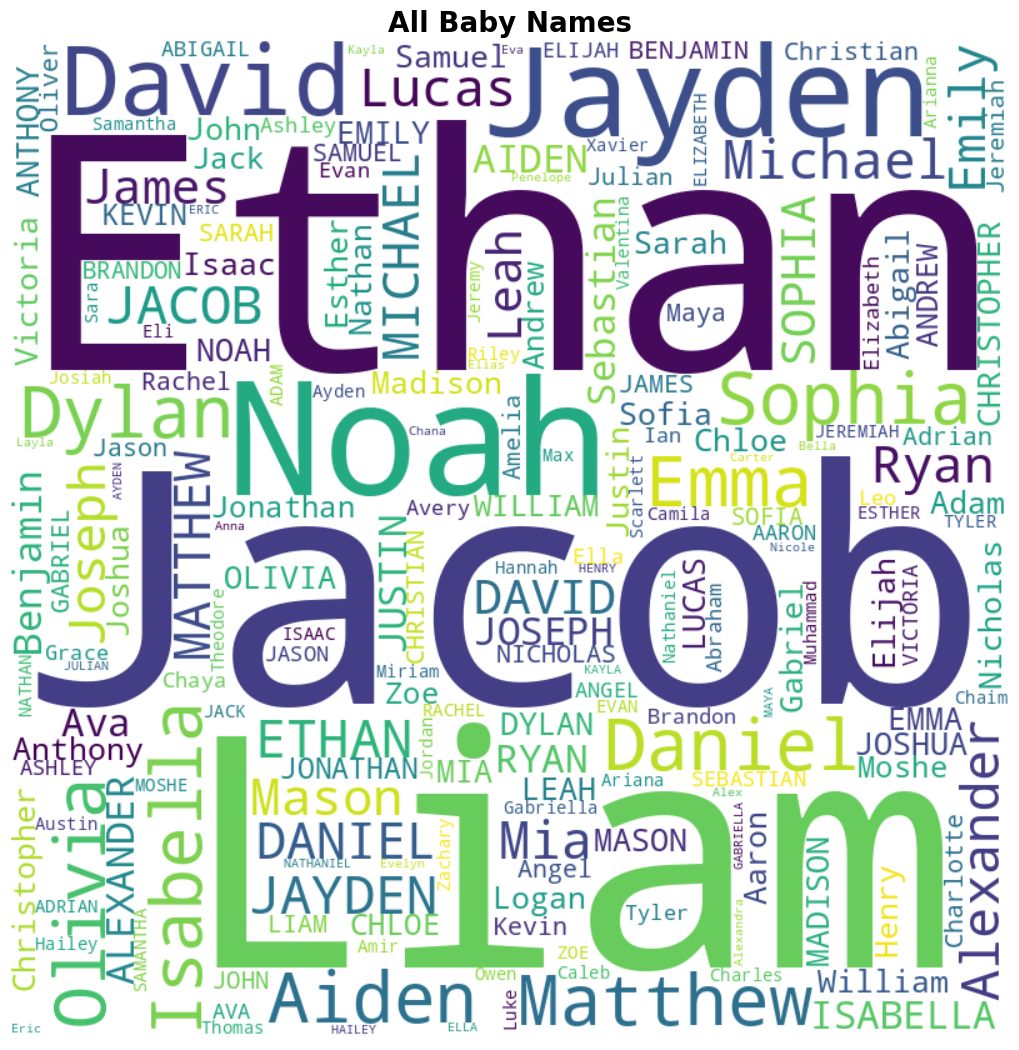

In [ ]:
def plot_all_names_wordcloud(names_dict):
    wordcloud = WordCloud(background_color='white', width=800, height=800).generate_from_frequencies(names_dict)

    plt.figure(figsize=(10, 10), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title("All Baby Names", fontsize=20, fontweight='bold')
    plt.show()

# Plot wordcloud for all names
plot_all_names_wordcloud(name_count_dict)


## Explore popular baby name trends for different genders and ethnicities

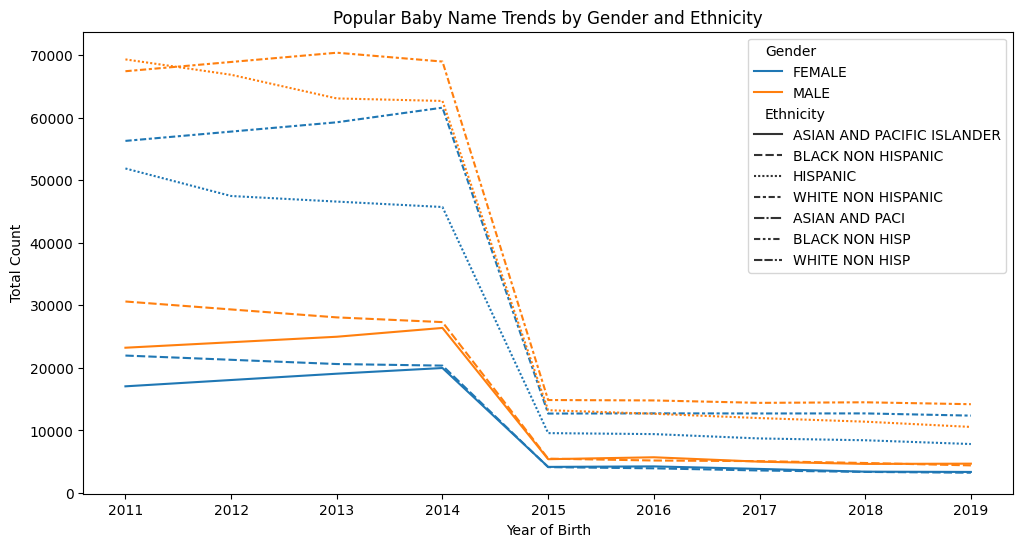

In [ ]:
# Explore popular baby name trends for different genders and ethnicities
grouped_df = df.groupby(['Year of Birth', 'Gender', 'Ethnicity']).agg({'Child\'s First Name': 'count', 'Count': 'sum'}).reset_index()
grouped_df = grouped_df.rename(columns={'Child\'s First Name': 'Unique Names'})

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Year of Birth', y='Count', hue='Gender', style='Ethnicity')
plt.title('Popular Baby Name Trends by Gender and Ethnicity')
plt.xlabel('Year of Birth')
plt.ylabel('Total Count')
plt.show()

## Baby name diversity

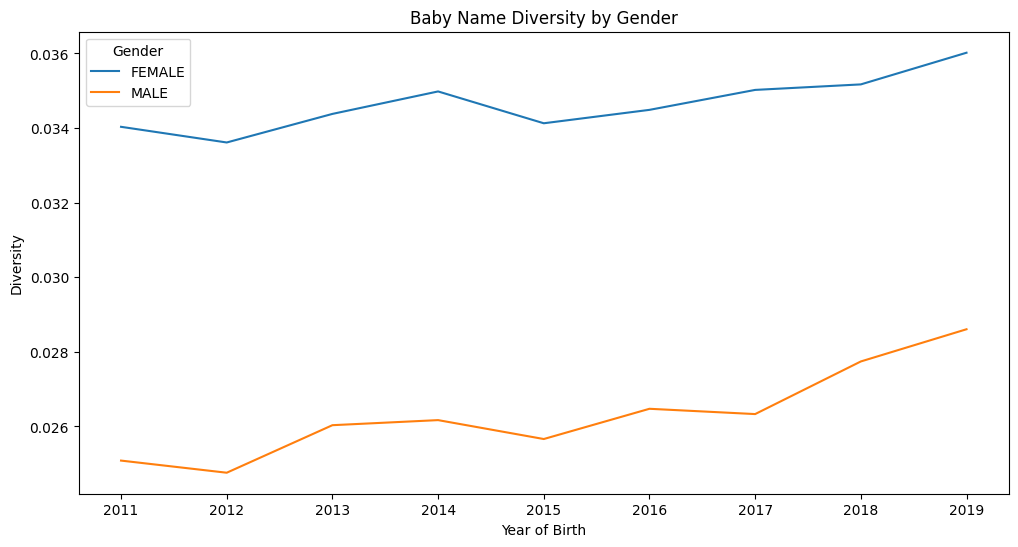

In [ ]:
diversity_df = df.groupby(['Year of Birth', 'Gender']).agg({'Child\'s First Name': 'count', 'Count': 'sum'}).reset_index()
diversity_df['Diversity'] = diversity_df['Child\'s First Name'] / diversity_df['Count']

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=diversity_df, x='Year of Birth', y='Diversity', hue='Gender')
plt.title('Baby Name Diversity by Gender')
plt.xlabel('Year of Birth')
plt.ylabel('Diversity')
plt.show()

## Cultural background of baby names

In [ ]:
# Cultural background of baby names
cultural_background_df = df.groupby(['Ethnicity', 'Child\'s First Name']).agg({'Count': 'sum'}).reset_index()
cultural_background_df = cultural_background_df.sort_values(['Ethnicity', 'Count'], ascending=[True, False])

# Print top 10 names for each ethnicity
for ethnicity in cultural_background_df['Ethnicity'].unique():
    print(f"Top 10 Names for {ethnicity}:")
    print(cultural_background_df[cultural_background_df['Ethnicity'] == ethnicity].head(10))
    print("\n")

# Length and syllable structure of baby names
df['Name Length'] = df['Child\'s First Name'].str.len()

Top 10 Names for ASIAN AND PACI:
          Ethnicity Child's First Name  Count
295  ASIAN AND PACI               RYAN    985
133  ASIAN AND PACI              ETHAN    935
90   ASIAN AND PACI              CHLOE    860
181  ASIAN AND PACI             JAYDEN    748
313  ASIAN AND PACI             SOPHIA    720
277  ASIAN AND PACI             OLIVIA    660
236  ASIAN AND PACI              LUCAS    645
129  ASIAN AND PACI               ERIC    615
13   ASIAN AND PACI              AIDEN    590
263  ASIAN AND PACI           MUHAMMAD    560


Top 10 Names for ASIAN AND PACIFIC ISLANDER:
                       Ethnicity Child's First Name  Count
818   ASIAN AND PACIFIC ISLANDER             Jayden   2298
681   ASIAN AND PACIFIC ISLANDER              Ethan   2186
1081  ASIAN AND PACIFIC ISLANDER               Ryan   2005
934   ASIAN AND PACIFIC ISLANDER              Lucas   1953
999   ASIAN AND PACIFIC ISLANDER           Muhammad   1846
440   ASIAN AND PACIFIC ISLANDER              Aiden   1765
1

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(ethnicity, names, counts):
    wordcloud = WordCloud(background_color='white', width=800, height=800).generate_from_frequencies(dict(zip(names, counts)))

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Top Baby Names for {ethnicity}", fontsize=15, fontweight='bold')
    plt.show()

### Plot wordcloud for each ethnicity

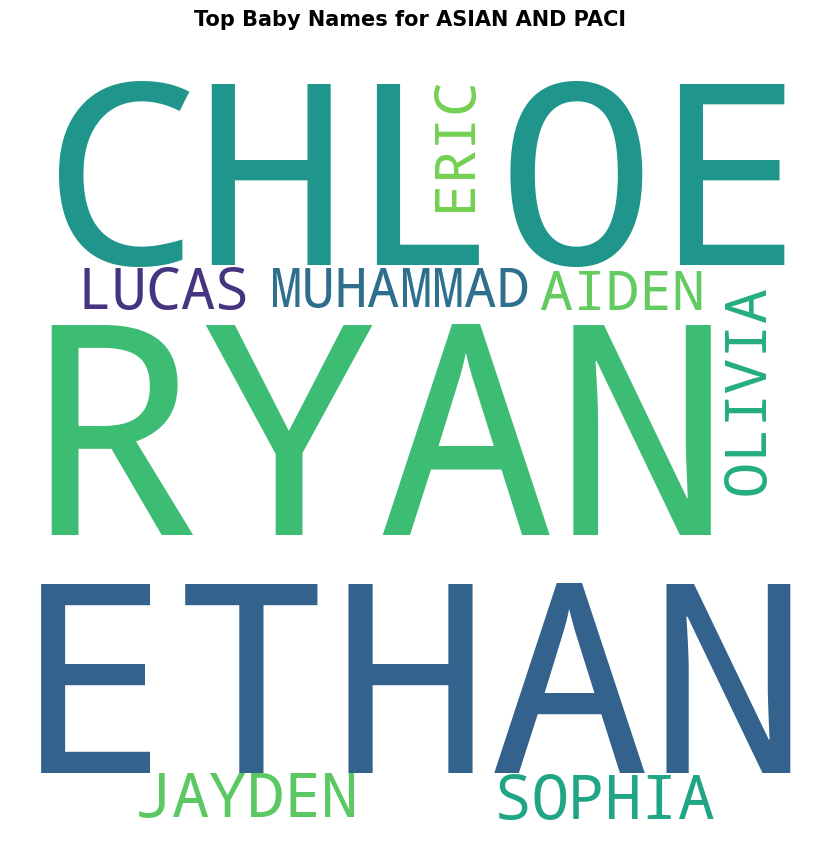

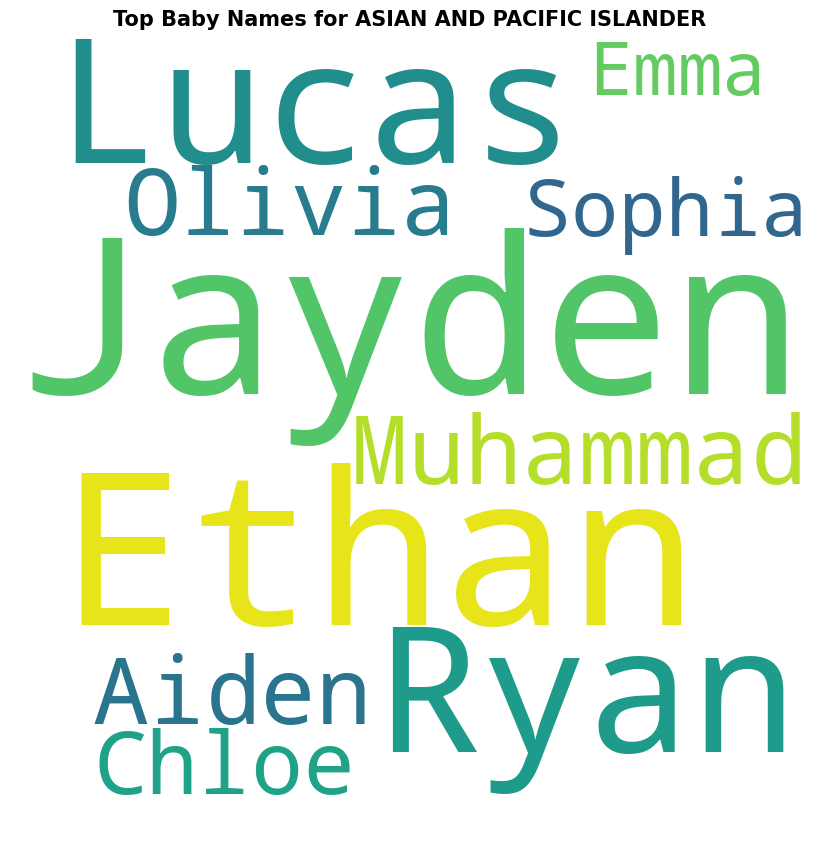

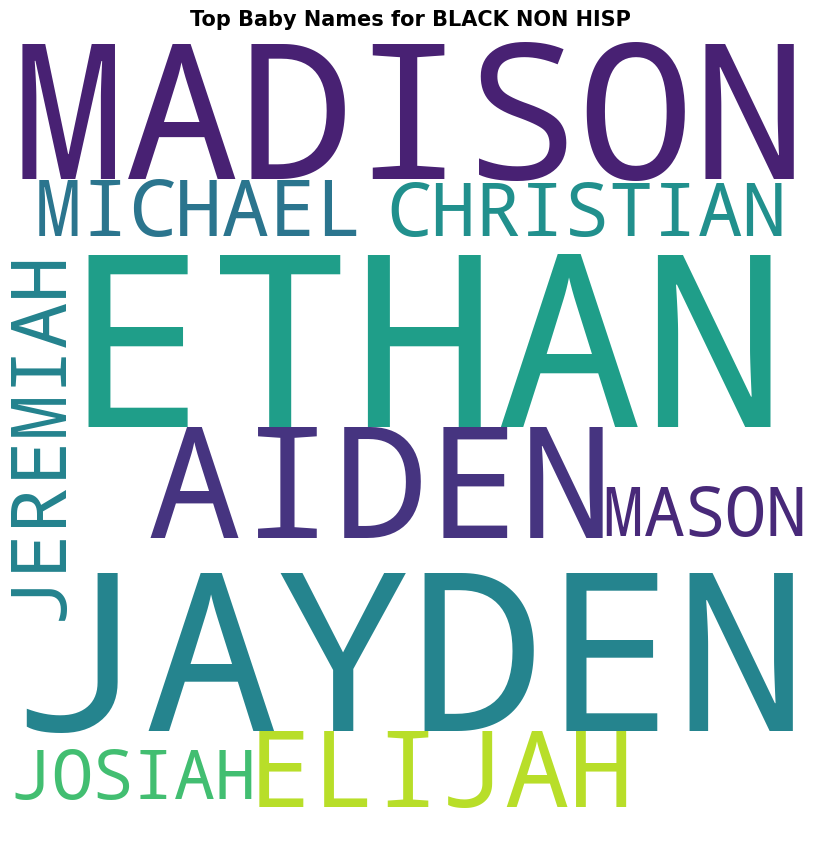

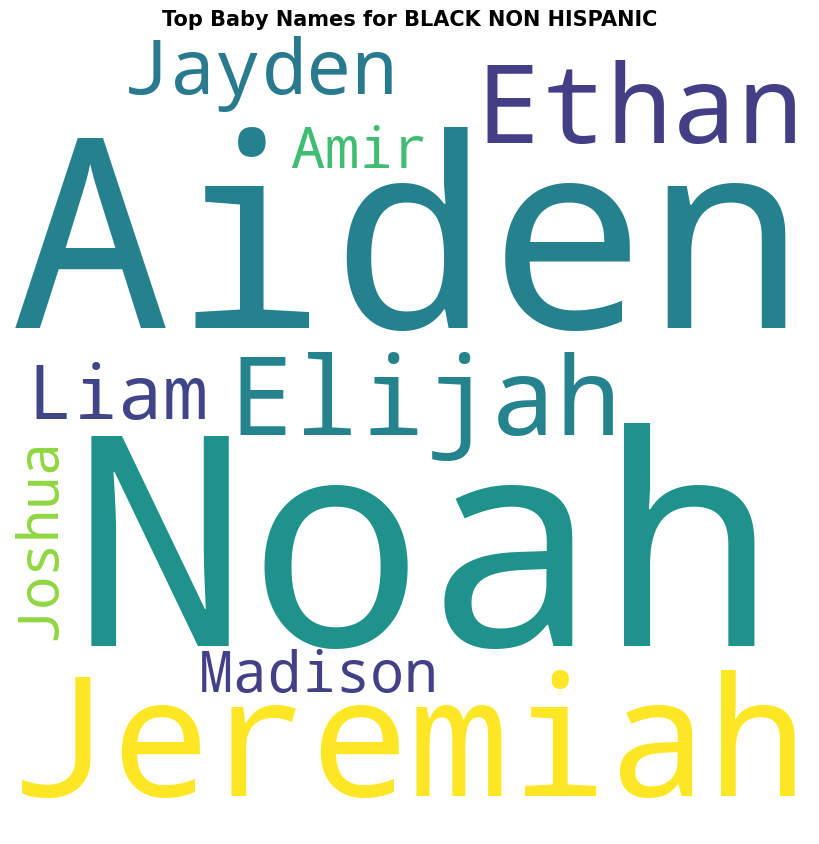

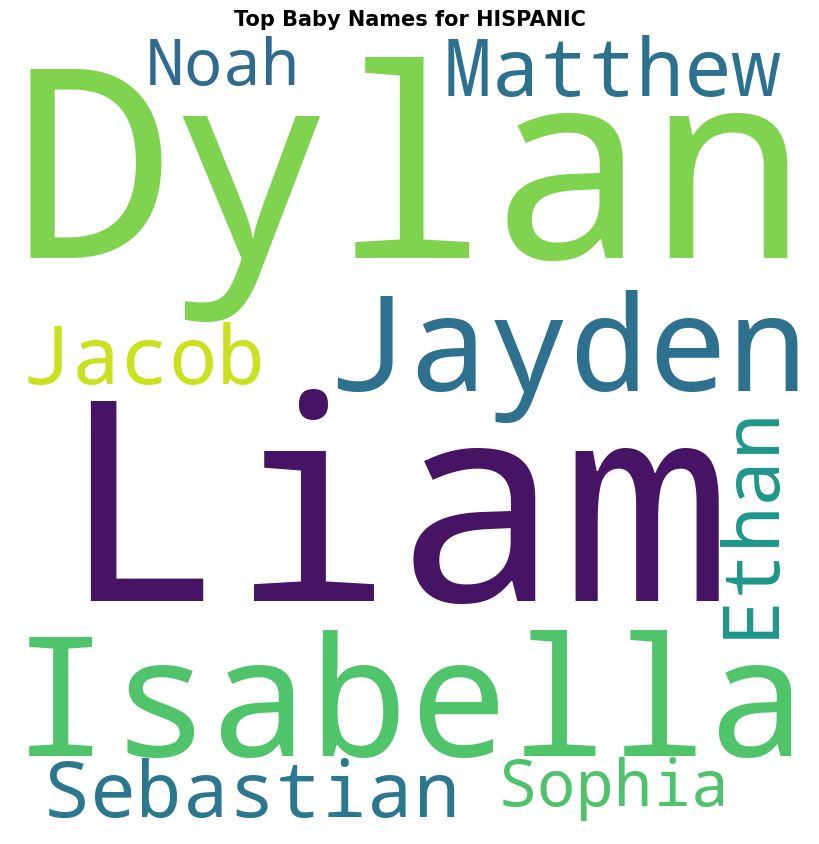

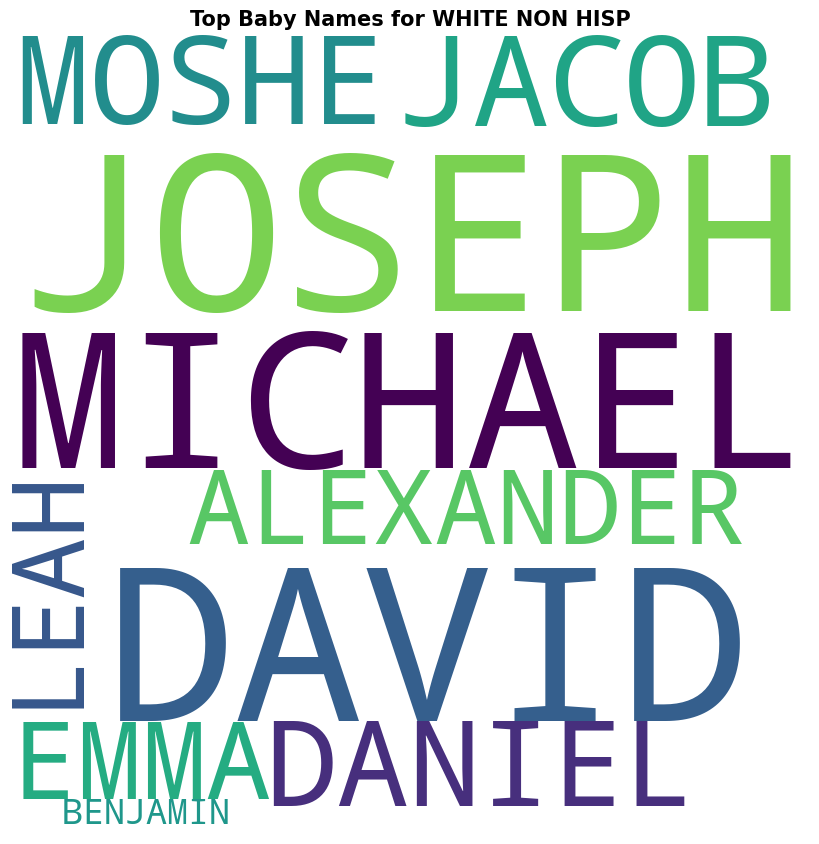

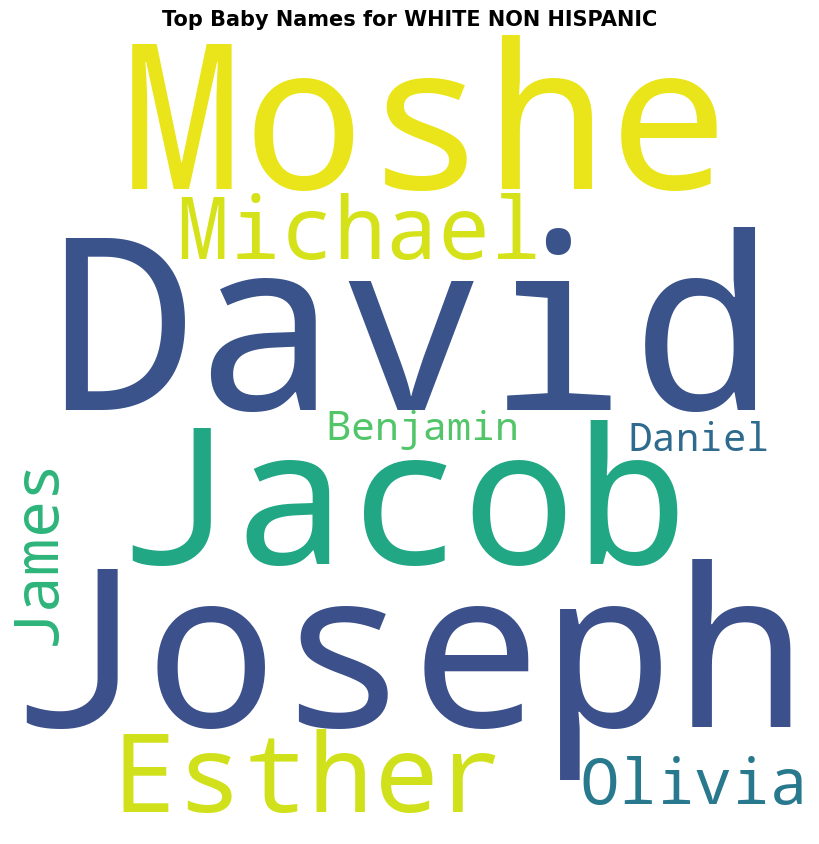

In [ ]:
for ethnicity in cultural_background_df['Ethnicity'].unique():
    names = cultural_background_df[cultural_background_df['Ethnicity'] == ethnicity].head(10)['Child\'s First Name'].tolist()
    counts = cultural_background_df[cultural_background_df['Ethnicity'] == ethnicity].head(10)['Count'].tolist()
    plot_wordcloud(ethnicity, names, counts)

## Length of Baby Names by Ethnicity and Gender

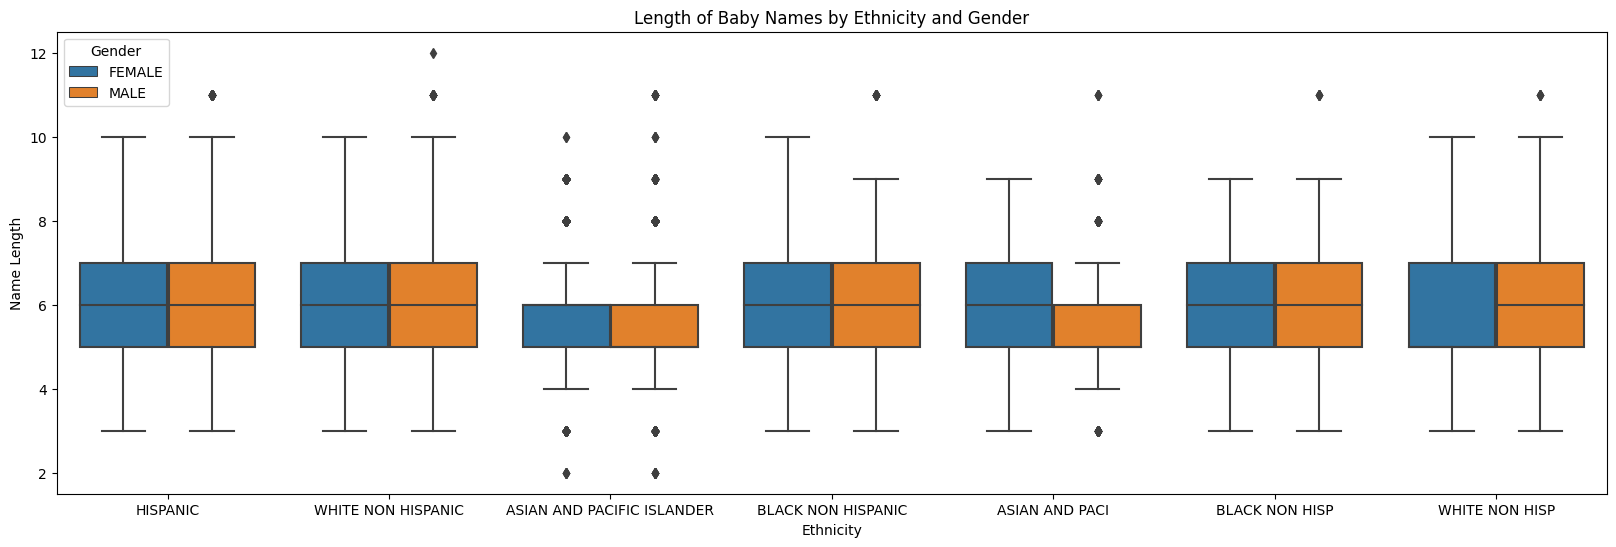

In [ ]:
# Plot the results
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='Ethnicity', y='Name Length', hue='Gender')
plt.title('Length of Baby Names by Ethnicity and Gender')
plt.xlabel('Ethnicity')
plt.ylabel('Name Length')
plt.show()

## two violin charts that display the distribution of name length across different genders and races.

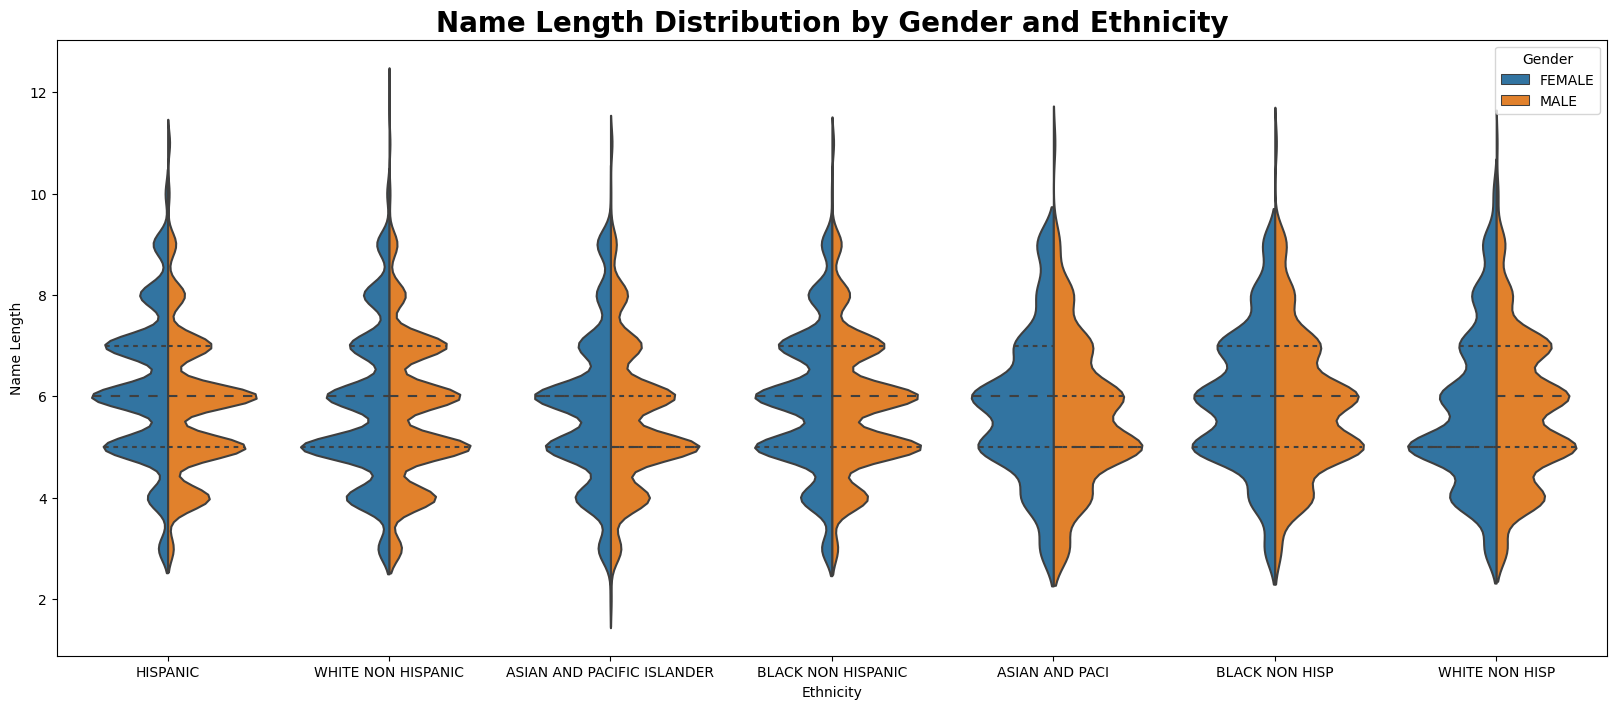

In [ ]:
import seaborn as sns

# Violin plot for Name Length by Gender and Ethnicity
plt.figure(figsize=(20, 8))
sns.violinplot(x='Ethnicity', y='Name Length', hue='Gender', data=df, split=True, inner='quartile')
plt.title('Name Length Distribution by Gender and Ethnicity', fontsize=20, fontweight='bold')
plt.show()

## Use KMeans cluster analysis to identify naming patterns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  Child's First Name  Name Length  Count  Cluster
0            AALIYAH          7.0   1275        0
1              AARAV          5.0    125        2
2              AARON          5.0   2844        1
3              AAYAN          5.0     65        2
4               ABBY          4.0    105        2


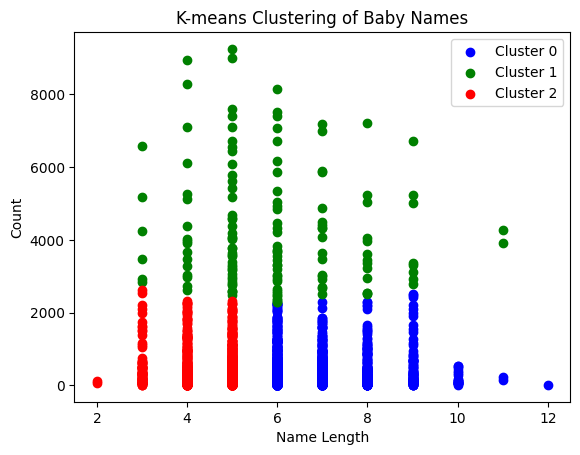

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Add a new feature for name length
df['Name Length'] = df['Child\'s First Name'].str.len()

# Group by name, and calculate the average length and total count for each name
name_df = df.groupby("Child's First Name").agg({"Name Length": "mean", "Count": "sum"}).reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(name_df[["Name Length", "Count"]])

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
name_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Print the result
print(name_df.head())

# Define the color map
colors = ['blue', 'green', 'red']

# Plot each cluster
for i in range(3):
    plt.scatter(name_df[name_df['Cluster'] == i]['Name Length'], 
                name_df[name_df['Cluster'] == i]['Count'], 
                color=colors[i], 
                label=f'Cluster {i}')

plt.xlabel('Name Length')
plt.ylabel('Count')
plt.title('K-means Clustering of Baby Names')
plt.legend()
plt.show()